In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import patsy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import plotly.express as px
%matplotlib inline

In [2]:
rg = pd.read_csv('/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/OUTSIDERG/outside_sumstats/rg_SES_mat.tsv',sep="\s+",header=None).set_index(0)

In [3]:
rg.index = ["f5","f10","f15","f34","EA4","EA_direct","EA_indirect","EA3","CP","INT","Income","Townsend"]
rg.columns = rg.index

In [4]:
rg["f10"] = rg.f10*-1
rg["f5"] = rg.f5*-1
rg["Townsend"] = rg.Townsend*-1

In [5]:
rg.loc["f10"] = rg.loc["f10"]*-1
rg.loc["f5"] = rg.loc["f5"]*-1
rg.loc["Townsend"] = rg.loc["Townsend"]*-1

In [6]:
cut = ["f5","f10","f15","EA4","EA_direct","EA_indirect","INT","Income","Townsend"]

In [7]:
newlabs = ["Factor 5","Factor 10","Factor 15","Educational Attainment","Cognitive Performance","Household Income","Social Enrichment","EA-Direct","EA-Indirect"]

In [8]:
rg_cut = rg.loc[cut,cut]
rg_cut.index = newlabs
rg_cut.columns = newlabs

In [9]:
prs_results = pd.read_csv("/stanley/robinson/ccarey/factor_paper_revision/prs_results/SES.tsv",sep="\t")

In [10]:
dfp = prs_results.pivot(index='trait', columns='factor', values='r2')*100
index_order = ["Occupation","Income","Years of Education","Completed College","Peabody Verbal ","Neighborhood Happiness"]
col_order = ["f5","f10","f15"]
dfp = dfp.loc[index_order,col_order]

In [11]:
yerr_lower = prs_results.pivot(index='trait', columns='factor', values='lower')*100
yerr_lower = dfp-yerr_lower.loc[index_order,col_order]

In [12]:
yerr_upper = prs_results.pivot(index='trait', columns='factor', values='upper')*100
yerr_upper = yerr_upper.loc[index_order,col_order]-dfp

In [13]:
err = []
for col in yerr_lower:  # Iterate over bar groups (represented as columns)
    err.append([yerr_lower[col].values, yerr_upper[col].values])

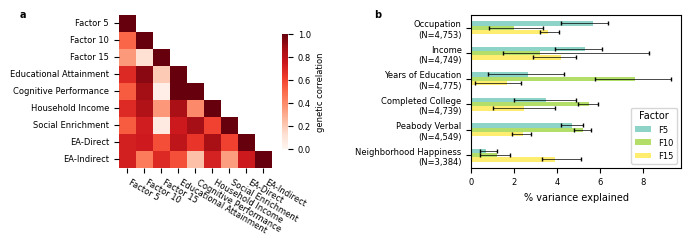

In [14]:
dfp2 = dfp.copy()
n_dict = {"Occupation":"Occupation (N=4,753)",
          "Income":"Income (N=4,749)",
          "Years of Education":"Years of Education (N=4,775)",
          "Completed College":"Completed College (N=4,739)",
          "Peabody Verbal ":"Peabody Verbal (N=4,549)",
          "Neighborhood Happiness":"Neighborhood Happiness (N=3,384)"}
dfp2['name_n']=[n_dict.get(x,x) for x in dfp2.index.tolist()]
dfp2.set_index("name_n",inplace=True)

fig = plt.figure(figsize=(7.086, 2.5))
ax1 = fig.add_subplot(1,2,1)
matrix = np.triu(rg_cut,1)
sns.heatmap(rg_cut,mask=matrix,cmap="Reds",vmin=0,vmax=1,square=True,cbar_kws={"shrink": 0.75, "label": "genetic correlation"})
ax1.collections[0].colorbar.ax.tick_params(labelsize=6)
# ax = plt.gca()
out = plt.setp(ax1.get_xticklabels(), rotation=-30, horizontalalignment='left')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.figure.axes[-1].yaxis.label.set_size(6)


ax2 = fig.add_subplot(1,2,2)
dfp2.plot(kind="barh",xerr=err,cmap=plt.get_cmap("Set3"),ax=ax2,error_kw={"linewidth":0.5,"capsize":1.25})
ax2.set_ylabel(" ")
ax2.invert_yaxis()
ax2.set_xlabel("% variance explained", fontsize=7)
ax2.tick_params(axis='both', which='major', labelsize=6)
# plt.setp(plt.gca().get_xticklabels(), rotation=-20, horizontalalignment='left')
leg = plt.legend(labels=[x.upper() for x in dfp2.columns.tolist()],loc='lower right', fontsize=6, title='Factor')
leg.get_title().set_fontsize('7')

def wrap_labels(ax):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(text.replace(' (N', '\n(N'))
    ax.set_yticklabels(labels, rotation=0)
    
wrap_labels(ax2)

#ax3 = fig.add_subplot(gs[1, :])
#sns.heatmap(toplot, square=True,vmax=1, vmin=-1,cmap="RdBu_r",cbar_kws={"shrink": 0.40, "anchor":(1.3, 1.05)},ax=ax3)
#plt.setp(ax3.get_xticklabels(), rotation=0,fontsize=8)
#bbox=plt.gca().get_position()
#plt.gca().set_position([bbox.x0 + .02, bbox.y0, bbox.x1, bbox.y1])


fig.text(0.05, 0.93, 'a', ha='center', fontsize=7,fontweight='bold')
fig.text(0.55, 0.93, 'b', ha='center', fontsize=7,fontweight='bold')
#fig.text(-0.05, 0.47, 'C', ha='center', fontsize=14,fontweight='bold')

fig.tight_layout()

plt.savefig("/stanley/robinson/ccarey/factor_paper_revision/figures_RKWchecklist/Figure4_journal_RKW.pdf",format="pdf") #,bbox_inches="tight"
#plt.show()